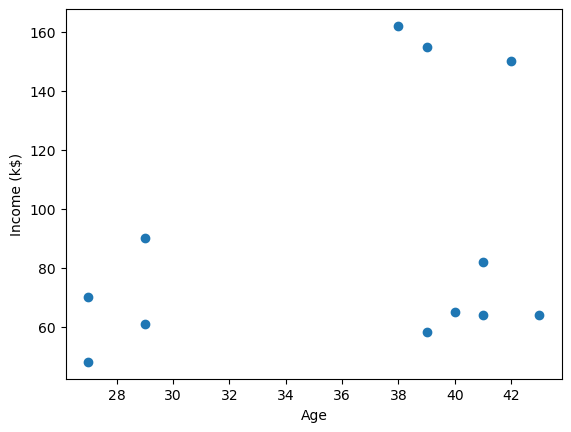

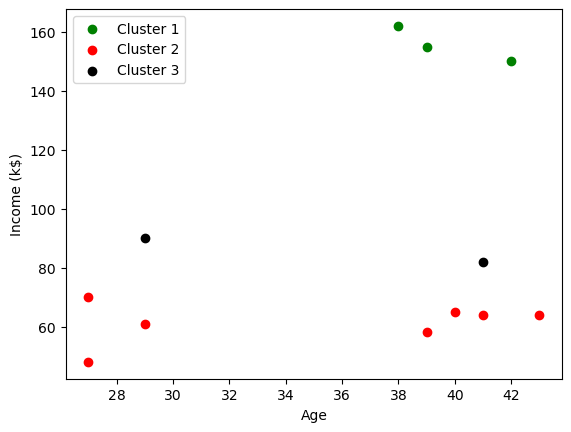

In [6]:
# 6a. Implement K-means on the income data shown on the next slide and show the results (use the data “as is”)

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import warnings

# Suppress the specific UserWarning related to the memory leak on Windows
warnings.filterwarnings(action='ignore', category=UserWarning, message='.*KMeans is known to have a memory leak on Windows with MKL.*')

# Use inline plotting for Jupyter notebooks
%matplotlib inline 

# Load the dataset
df = pd.read_csv("income.csv")
df.head()

# Plotting the initial scatter plot
plt.scatter(df['Age'], df['Income(k$)'])
plt.xlabel('Age')
plt.ylabel('Income (k$)')
plt.show()

# Applying K-Means clustering with explicit n_init value
km = KMeans(n_clusters=3, n_init=10)
y_predicted = km.fit_predict(df[['Age', 'Income(k$)']])
y_predicted

# Adding cluster column to the dataframe
df['cluster'] = y_predicted
df.head()

# Separating the clusters for plotting
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

# Plotting the clusters
plt.scatter(df1.Age, df1['Income(k$)'], color='green', label='Cluster 1')
plt.scatter(df2.Age, df2['Income(k$)'], color='red', label='Cluster 2')
plt.scatter(df3.Age, df3['Income(k$)'], color='black', label='Cluster 3')

plt.xlabel('Age')
plt.ylabel('Income (k$)')
plt.legend()
plt.show()

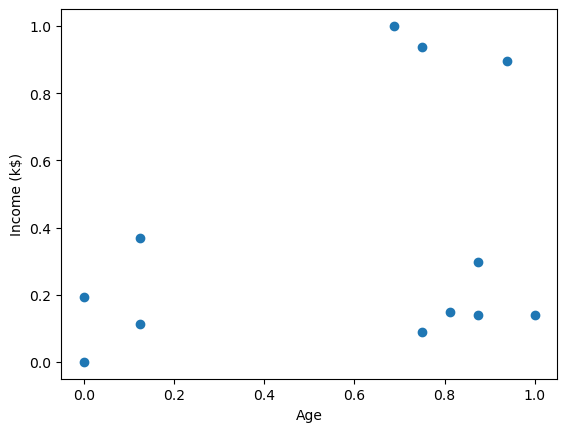

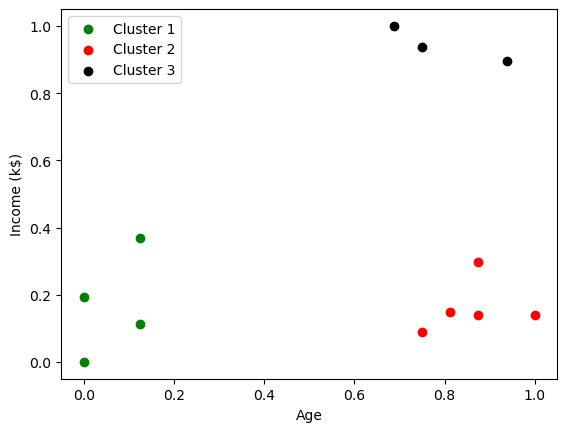

In [5]:
# 6b. Rerun the code after scaling your variables using the “min-max scaler."

import os
import warnings

# Set the environment variable before importing other libraries
os.environ['OMP_NUM_THREADS'] = '1'

# Suppress the specific warning
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# Use inline plotting for Jupyter notebooks
%matplotlib inline 

# Load the dataset
df = pd.read_csv("income.csv")
df.head()

# Scaling the variables using Min-Max Scaler
scaler = MinMaxScaler()

df['Income(k$)'] = scaler.fit_transform(df[['Income(k$)']])
df['Age'] = scaler.fit_transform(df[['Age']])

df.head()

# Plotting the initial scatter plot with scaled values
plt.scatter(df['Age'], df['Income(k$)'])
plt.xlabel('Age')
plt.ylabel('Income (k$)')
plt.show()

# Applying K-Means clustering with explicit n_init value
km = KMeans(n_clusters=3, n_init=10)
y_predicted = km.fit_predict(df[['Age', 'Income(k$)']])
y_predicted

# Adding cluster column to the dataframe
df['cluster'] = y_predicted
df.head()

# Separating the clusters for plotting
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

# Plotting the clusters
plt.scatter(df1.Age, df1['Income(k$)'], color='green', label='Cluster 1')
plt.scatter(df2.Age, df2['Income(k$)'], color='red', label='Cluster 2')
plt.scatter(df3.Age, df3['Income(k$)'], color='black', label='Cluster 3')

plt.xlabel('Age')
plt.ylabel('Income (k$)')
plt.legend()
plt.show()